In [5]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
x,y = make_regression(n_samples=100,n_features=1,n_targets=1,noise=20,random_state=13)

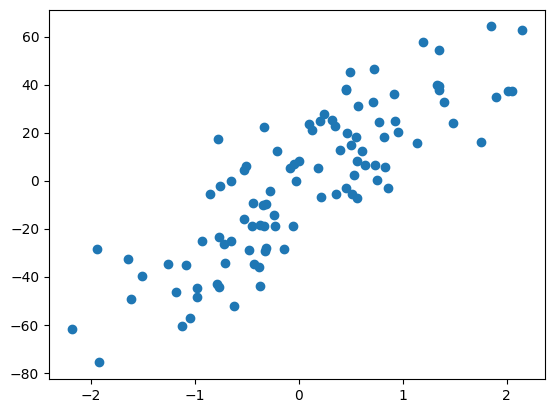

In [7]:
plt.scatter(x,y)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [12]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(x,y)
print(rr.coef_)
print(rr.intercept_)


[24.9546267]
-2.1269130035235735


In [13]:
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=100)
rr1.fit(x,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


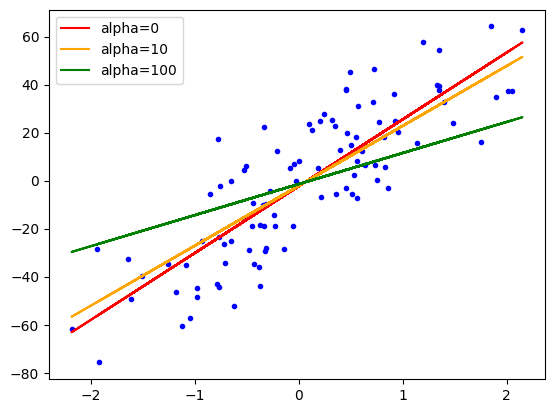

In [15]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color = 'red', label = 'alpha=0')
plt.plot(x,rr.predict(x),color = 'orange', label = 'alpha=10')
plt.plot(x,rr1.predict(x),color = 'green', label = 'alpha=100')
plt.legend()


In [53]:
class MyRidge():
  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None
  
  def fit(self,x_train,y_train):
    num = 0
    den = 0
    for i in range(x_train.shape[0]):
      num = num+(y_train[i] - y_train.mean())*(x_train[i] - x_train.mean())
      den = den+(x_train[i] - x_train.mean())*(x_train[i] - x_train.mean())
    
    self.m = num/(den+ self.alpha)
    self.b = y_train.mean() - (self.m*x_train.mean())

    self.coef_ = [self.m]
    self.intercept_ = self.b
  
  def predict(self, x_test):
    return self.coef_[0] * x_test + self.intercept_

In [54]:
mr = MyRidge(alpha= 0)
mr.fit(x,y)
print(mr.coef_)
print(mr.intercept_)



[array([27.82809103])]
[-2.29474456]


In [55]:
mr1 = MyRidge(alpha= 10)
mr1.fit(x,y)
print(mr1.coef_)
print(mr1.intercept_)

[array([24.9546267])]
[-2.126913]


In [56]:
mr2 = MyRidge(alpha= 100)
mr2.fit(x,y)
print(mr2.coef_)
print(mr2.intercept_)

[array([12.93442104])]
[-1.42484415]


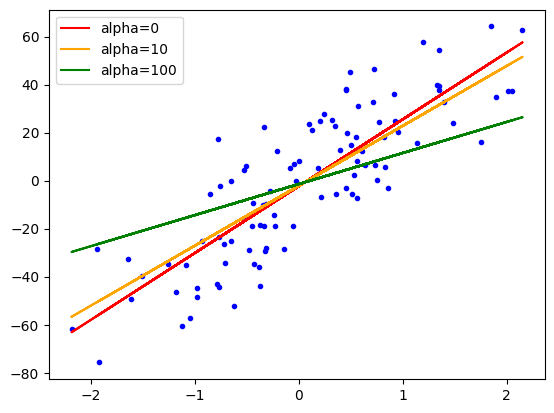

In [57]:
plt.plot(x,y,'b.')
plt.plot(x,mr.predict(x),color = 'red', label = 'alpha=0')
plt.plot(x,mr1.predict(x),color = 'orange', label = 'alpha=10')
plt.plot(x,mr2.predict(x),color = 'green', label = 'alpha=100')
plt.legend()